In [ ]:
class Tensor:
    def __init__(self, data):
        self.data = data

    def __add__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(self.data + other.data)
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(self.data * other.data)
        return out

    def __radd__(self, other):
        return self + other

    def __rmul__(self, other):
        return self * other

    def __repr__(self):
        return f"Tensor with {self.data}"

# `self.prev`

In [ ]:
import numpy as np

In [ ]:
class Tensor:

    def __init__(self, data, prev=()):
        self.data = data
        self.prev = prev

    def __add__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(self.data + other.data, prev=(self, other))
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(self.data * other.data, prev=(self, other))
        return out

    def __radd__(self, other):
        return self + other

    def __rmul__(self, other):
        return self * other

    def relu(self):
        return Tensor(np.maximum(self.data, 0), prev=(self,))

    def __repr__(self):
        return f"Tensor(data={self.data}, prev={self.prev})"



In [ ]:
Tensor(1.0) + Tensor(2.0)

Tensor(data=3.0, prev=(Tensor(data=1.0, prev=()), Tensor(data=2.0, prev=())))

In [ ]:
(Tensor(1.0) + Tensor(2.0)) * Tensor(5.0)

Tensor(data=15.0, prev=(Tensor(data=3.0, prev=(Tensor(data=1.0, prev=()), Tensor(data=2.0, prev=()))), Tensor(data=5.0, prev=())))

In [ ]:
a = Tensor(1.0)
b = Tensor(2.0)
c = Tensor(-5.0)

In [ ]:
((a + b) * c).relu()

Tensor(data=0.0, prev=(Tensor(data=-15.0, prev=(Tensor(data=3.0, prev=(Tensor(data=1.0, prev=()), Tensor(data=2.0, prev=()))), Tensor(data=-5.0, prev=()))),))

https://alexlenail.me/NN-SVG/index.html


# Neuron

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$


$$y = w_1 x_1 + w_2 x_2 + b$$


In [ ]:
class Neuron:

    def __init__(self, nin):
        self.w = [Tensor(np.random.uniform(-1,1)) for _ in range(nin)]
        self.b = Tensor(np.random.uniform(-1,1))

    def __call__(self, x):
        act = sum([wi * xi for wi, xi in zip(self.w, x)]) + self.b
        out = act.relu()
        return out

In [ ]:
n = Neuron(3)
n([1,2,3])

Tensor(data=1.5152039791577032, prev=(Tensor(data=2.3009499277086976, prev=(Tensor(data=1.0003216770905028, prev=(Tensor(data=0.0984853304522435, prev=(Tensor(data=0.0984853304522435, prev=(Tensor(data=0.0984853304522435, prev=()), Tensor(data=1, prev=()))), Tensor(data=0, prev=()))), Tensor(data=0.9018363466382593, prev=(Tensor(data=0.45091817331912964, prev=()), Tensor(data=2, prev=()))))), Tensor(data=1.3006282506181948, prev=(Tensor(data=0.4335427502060649, prev=()), Tensor(data=3, prev=()))))), Tensor(data=-0.7857459485509943, prev=())))

In [ ]:
class Neuron:

    def __init__(self, nin):
        self.w = [Tensor(np.random.uniform(-1,1)) for _ in range(nin)]
        self.b = Tensor(np.random.uniform(-1,1))

    def __call__(self, x):
        #act = sum([wi * xi for wi, xi in zip(self.w, x)]) + self.b
        act = sum([wi * xi for wi, xi in zip(self.w, x)], self.b)
        out = act.relu()
        return out


In [ ]:
np.random.seed(123)
Neuron(3)

In [ ]:
x = [2.3, 3.4, 4.5]

n = Neuron(3)
n(x)

Tensor(data=5.18321845249119, prev=(Tensor(data=5.18321845249119, prev=(Tensor(data=0.8563406670296513, prev=(Tensor(data=1.3792167381833167, prev=(Tensor(data=0.3696594771697266, prev=()), Tensor(data=1.0095572610135901, prev=(Tensor(data=0.43893793957112615, prev=()), Tensor(data=2.3, prev=()))))), Tensor(data=-0.5228760711536654, prev=(Tensor(data=-0.15378707975107808, prev=()), Tensor(data=3.4, prev=()))))), Tensor(data=4.326877785461539, prev=(Tensor(data=0.961528396769231, prev=()), Tensor(data=4.5, prev=()))))),))

n! = n * (n-1) * ... * 1

n! = n * (n-1)!

In [ ]:
def factorial(n):

    if n == 0:
        return 1

    else:
        return n * factorial(n - 1)

# Test the function
print(factorial(5))  # Output: 120


120


In [ ]:
def print_tensor_tree(tensor, level=0):
    indent = "    " * level
    print(f"{indent}Tensor(data={tensor.data})")
    for prev_tensor in tensor.prev:
        print_tensor_tree(prev_tensor, level + 1)

# Tree

[ChatGPT] What is the structure of recursion in Python?

In [ ]:
n(x)

Tensor(data=5.18321845249119, prev=(Tensor(data=5.18321845249119, prev=(Tensor(data=4.813558975321464, prev=(Tensor(data=0.4866811898599247, prev=(Tensor(data=1.0095572610135901, prev=(Tensor(data=1.0095572610135901, prev=(Tensor(data=0.43893793957112615, prev=()), Tensor(data=2.3, prev=()))), Tensor(data=0, prev=()))), Tensor(data=-0.5228760711536654, prev=(Tensor(data=-0.15378707975107808, prev=()), Tensor(data=3.4, prev=()))))), Tensor(data=4.326877785461539, prev=(Tensor(data=0.961528396769231, prev=()), Tensor(data=4.5, prev=()))))), Tensor(data=0.3696594771697266, prev=()))),))

In [ ]:
def traverse_tensor(tensor, depth=0):
    # Print the current tensor's data with indentation based on the recursion depth
    print("  " * depth + f"Tensor(data={tensor.data:.2f})")
    # Recursively traverse the previous tensors
    for prev_tensor in tensor.prev:
        traverse_tensor(prev_tensor, depth + 1)

In [ ]:
traverse_tensor(n(x))

Tensor(data=5.18)
  Tensor(data=5.18)
    Tensor(data=0.86)
      Tensor(data=1.38)
        Tensor(data=0.37)
        Tensor(data=1.01)
          Tensor(data=0.44)
          Tensor(data=2.30)
      Tensor(data=-0.52)
        Tensor(data=-0.15)
        Tensor(data=3.40)
    Tensor(data=4.33)
      Tensor(data=0.96)
      Tensor(data=4.50)


In [ ]:
from graphviz import Digraph

# Function to add nodes and edges to the Graphviz graph from the tensor structure
def add_nodes_edges_graphviz(graph, tensor, parent_id=None, current_id=0):
    node_id = str(current_id)
    graph.node(node_id, label=f"{tensor.data:.2f}")
    if parent_id is not None:
        graph.edge(parent_id, node_id)
    next_id = current_id + 1
    for prev_tensor in tensor.prev:
        graph, next_id = add_nodes_edges_graphviz(graph, prev_tensor, node_id, next_id)
    return graph, next_id

# Function to plot the tensor tree and display it
def plot_tensor_tree(tensor):
    dot = Digraph()
    dot, _ = add_nodes_edges_graphviz(dot, tensor)
    return dot

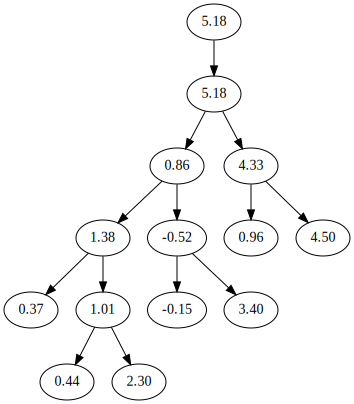

In [ ]:
plot_tensor_tree(n(x))

# Neural Networks

In [ ]:
class Layer:

    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        out = [n(x) for n in self.neurons]
        return out
        #return out[0] if len(out) == 1 else out

In [ ]:
Layer(3, 4)(x)



```
MLP(3, [4, 2, 1])

Layer(3,4)
Layer(4,2)
Layer(2,1)

Layer(nin, nout)

Neuron(nin)

[Neuron(3), Neuron(3), Neuron(3), Neuron(3)]
[Neuron(4), Neuron(4)]
[Neuron(2)]
```



In [ ]:
MLP(3, [4, 2, 1])

In [ ]:
class MLP:

    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [ ]:
n = MLP(3,[4,2,1])

In [ ]:
n(x)

In [ ]:
traverse_tensor(n(x))

In [ ]:
plot_tensor_tree(n(x))